#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 2 personnes. 

Rendu individuel sur simplonline

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

Nantes métropole souhaite fiabiliser les commandes des cantines. 

Le chef de projet de Nantes métropole vous demande donc d'analyser les
données afin de trouver les facteurs qui influencent la fréquentation des cantines et de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

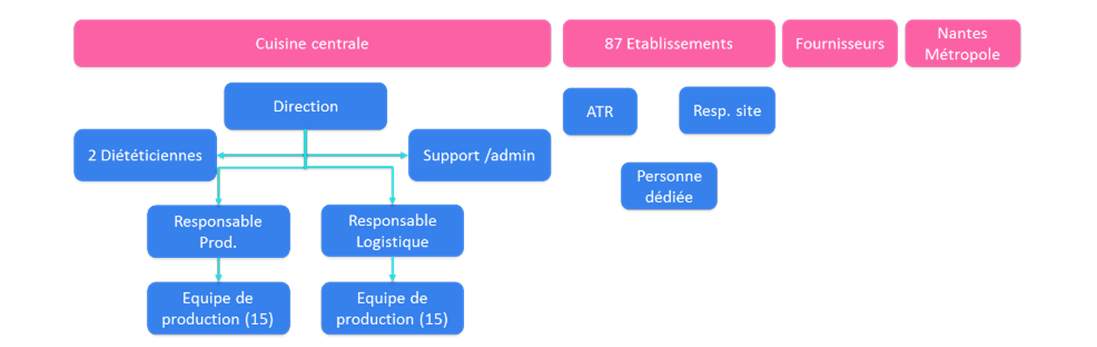

### 4 - Processus actuel

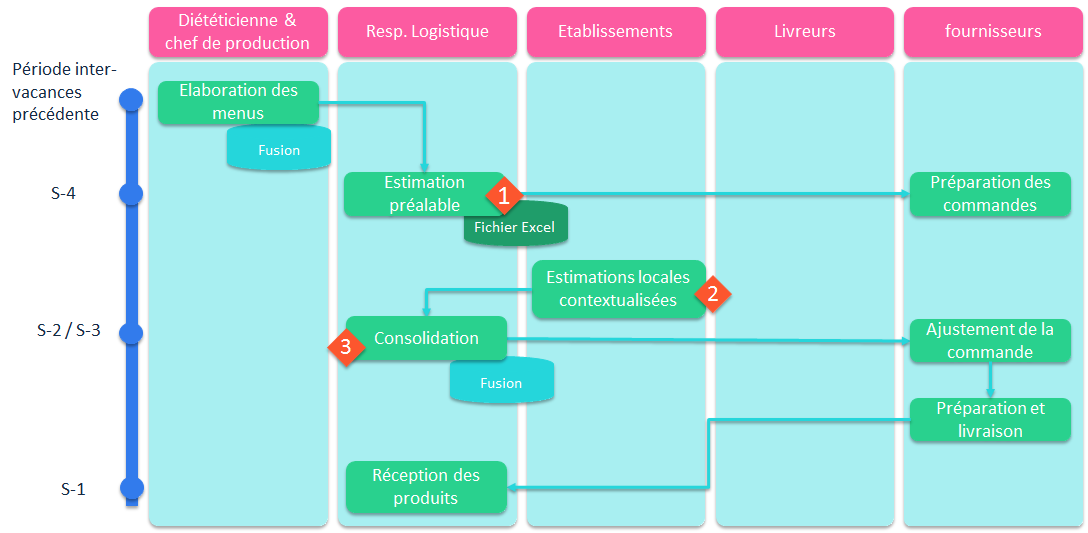

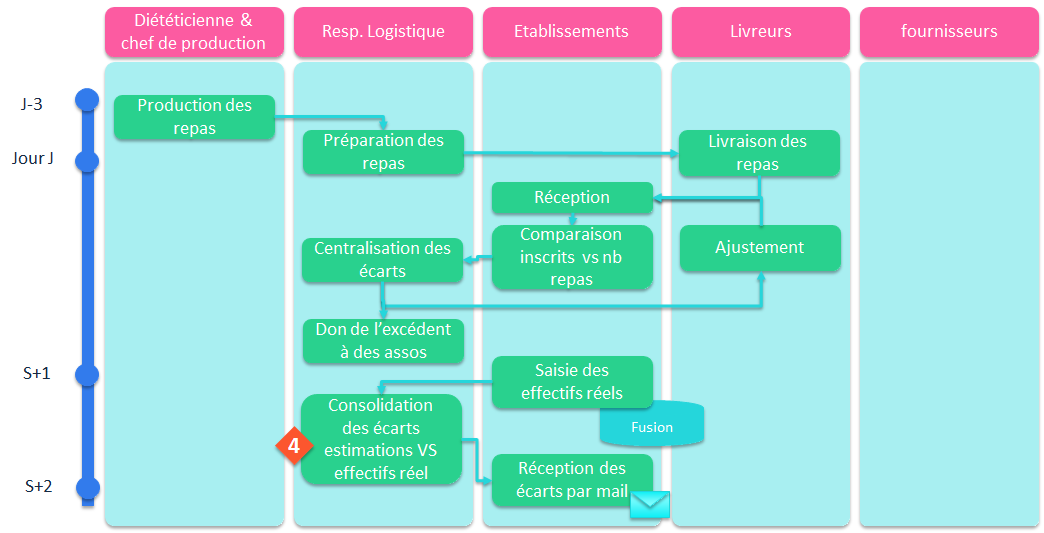

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Les données 

https://www.dropbox.com/s/q8m65klc49380h2/projet_cantines.csv?dl=0
    

### 6 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 7 - Recommandations

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


Par ailleurs, je vous recommande de filtrer les fréquentations anormalement basse. Cela correspond à des jours où il y a du avoir des grèves. Or on ne pourra prédire les grèves. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("projet_cantines.csv", sep=",")

In [4]:
data.head()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,bio,noel,frites,an_chinois,gaspillage_volume,gaspillage_pourcentagereel_moyen_annee,reel_std_annee,prevision,reel,effectif
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0,0,0,0,1160,NaN,3032.860872,12289,11129,17373
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0,0,0,0,750,NaN,3032.860872,12558,11808,17373
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,1,0,0,0,1012,NaN,3032.860872,12753,11741,17373
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0,0,0,0,490,NaN,3032.860872,12812,12322,17373
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0,0,0,0,1007,NaN,3032.860872,12309,11302,17373


In [5]:
data.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'menu',
       'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois',
       'gaspillage_volume', 'gaspillage_pourcentagereel_moyen_annee',
       'reel_std_annee', 'prevision', 'reel', 'effectif'],
      dtype='object')

c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


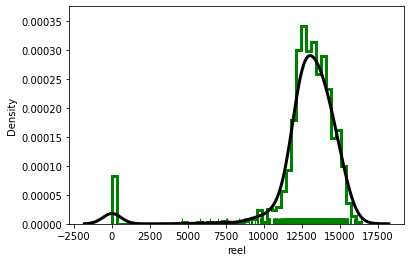

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.distplot(data.reel, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

# Tri sur les valeurs

In [7]:
#on commence par retirer les valeurs nulles
data = data[data.reel>0]

init = len(data)
print(data.shape)

(1156, 33)


In [8]:
# on créé la colonne fréquentation

data["freq"] = data.reel/data.effectif*100

<AxesSubplot:>

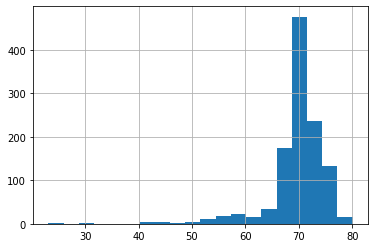

In [9]:
# on regarde le un histogramme
data["freq"].hist(bins=20)

In [10]:
data.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'menu',
       'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois',
       'gaspillage_volume', 'gaspillage_pourcentagereel_moyen_annee',
       'reel_std_annee', 'prevision', 'reel', 'effectif', 'freq'],
      dtype='object')

## Regardons l'impact des grèves 

On va faire une ANOVA

In [11]:
data.groupby('greves').freq.mean()

greves
0    70.236324
1    63.358657
Name: freq, dtype: float64

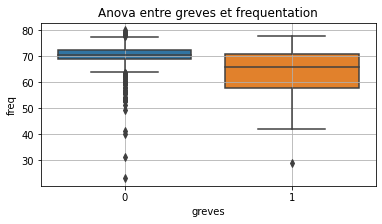

In [12]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='greves',y="freq",data=data, showfliers=True)
plt.title('Anova entre greves et frequentation')
plt.grid()
plt.show()

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
lm = ols('freq ~ greves', data = data).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [15]:
table

,df,sum_sq,mean_sq,F,PR(>F)
greves,1.0,3725.056449,3725.056449,144.252356,2.135235e-31
Residual,1154.0,29799.964833,25.823193,NaN,NaN


la pvaleur est quasi nulle -> il y a bien une corrélation 

On va supprimer les jours avec grève 

In [16]:
data = data[data.greves==0]

<AxesSubplot:>

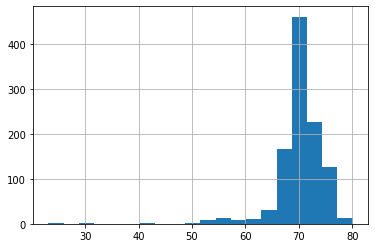

In [17]:
data.freq.hist(bins= 20)

Il reste des jours où le fréquentation est très basse

<AxesSubplot:>

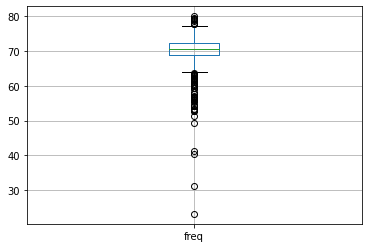

In [18]:
data.boxplot( column=["freq"])

In [19]:
seuil = 60

data = data[data.freq>seuil]

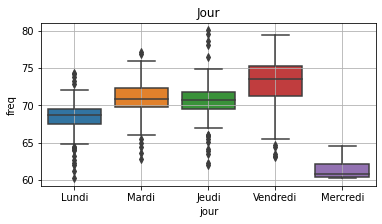

In [20]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='jour',y="freq",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

In [21]:
data.jour.unique()

array(['Lundi', 'Mardi', 'Jeudi', 'Vendredi', 'Mercredi'], dtype=object)

In [22]:
data = data[~(data.jour == "Mercredi")]

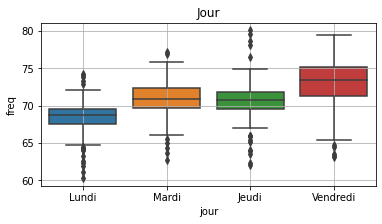

In [23]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='jour',y="freq",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

In [24]:
lm = ols('freq ~ jour', data = data).fit()
import statsmodels.api; 
table2 = sm.stats.anova_lm(lm)

In [25]:
table2

,df,sum_sq,mean_sq,F,PR(>F)
jour,3.0,2841.386408,947.128803,165.025937,2.572810e-87
Residual,1028.0,5899.971996,5.739272,NaN,NaN


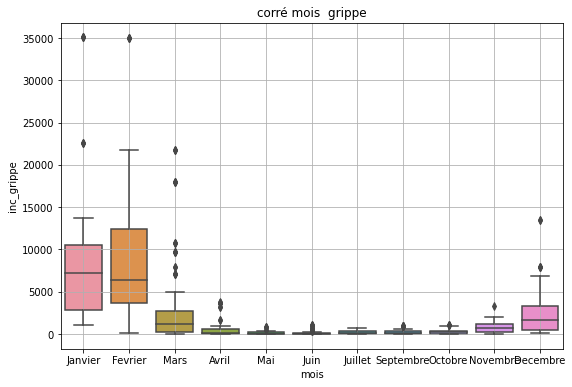

In [26]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_grippe",data=data, showfliers=True)
plt.title('corré mois  grippe')
plt.grid()
plt.show()

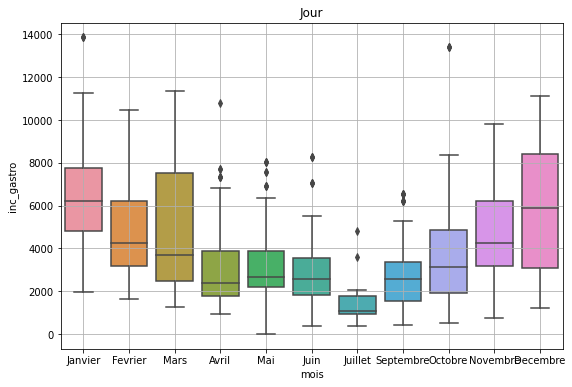

In [27]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_gastro",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

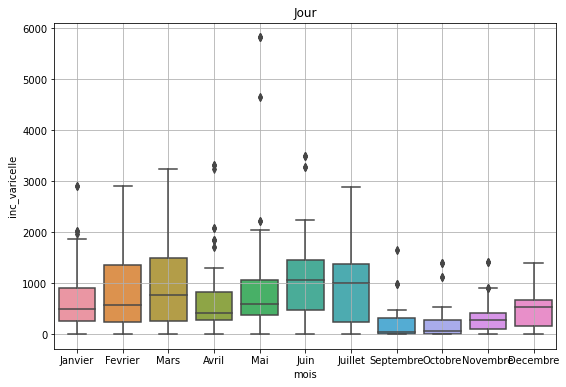

In [28]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y='inc_varicelle',data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

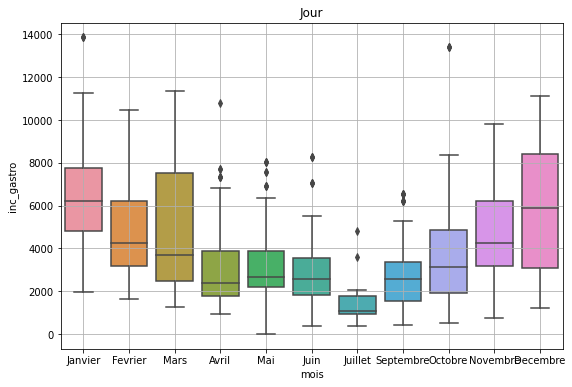

In [29]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_gastro",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

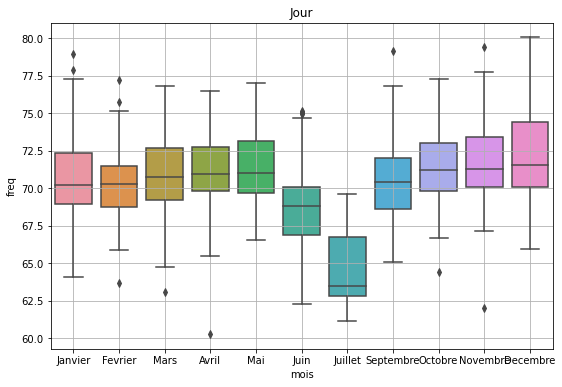

In [30]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="freq",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

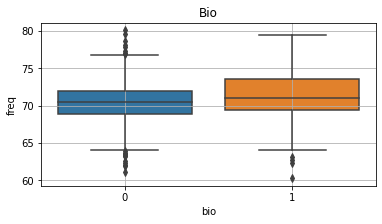

In [31]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='bio',y="freq",data=data, showfliers=True)
plt.title('Bio')
plt.grid()
plt.show()

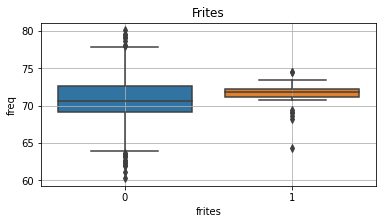

In [32]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='frites',y="freq",data=data, showfliers=True)
plt.title('Frites')
plt.grid()
plt.show()

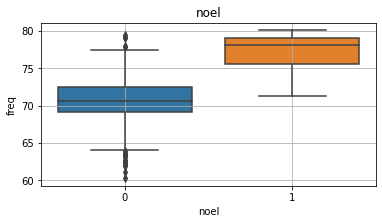

In [33]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='noel',y="freq",data=data, showfliers=True)
plt.title('noel')
plt.grid()
plt.show()

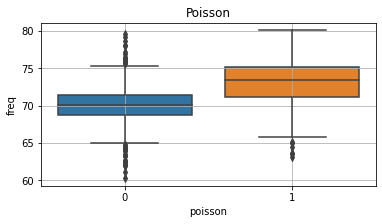

In [34]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='poisson',y="freq",data=data, showfliers=True)
plt.title('Poisson')
plt.grid()
plt.show()

In [35]:
num = data[['inc_grippe', 'inc_gastro', 'inc_varicelle', 'gaspillage_volume', 'prevision', 'reel', 'effectif', 'freq']]

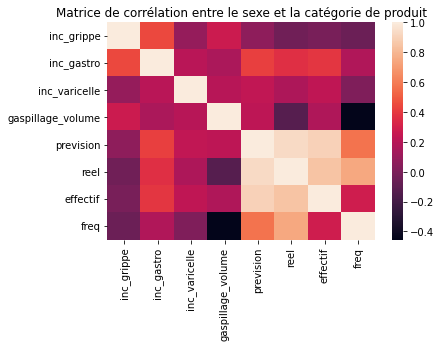

In [36]:
sns.heatmap(num.corr())
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

In [37]:
# Création de ma table de contingence
X = "jour"
Y = "poisson"

cont_1 = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

poisson,0,1,Total
jour,,,
Jeudi,236,9,245
Lundi,244,15,259
Mardi,188,62,250
Vendredi,93,185,278
Total,761,271,1032


In [38]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(data)
indep = round(tx.dot(ty) / n)

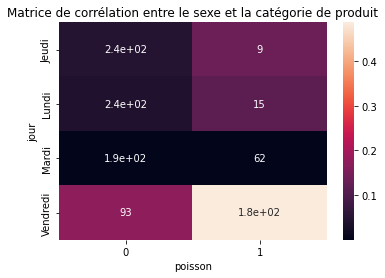

In [39]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

## Regression linéaire

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
#from functions import *

In [40]:
data.columns


Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'menu',
       'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois',
       'gaspillage_volume', 'gaspillage_pourcentagereel_moyen_annee',
       'reel_std_annee', 'prevision', 'reel', 'effectif', 'freq'],
      dtype='object')

In [51]:
reg_multi = smf.ols('freq~annee_scolaire+jour+semaine+jour+mois+veille_ferie+retour_ferie+retour_vacances+veille_vacances+fete_musulmane+ramadan+fete_chretienne+fete_juive+porc+viande+poisson+bio+noel+frites+an_chinois', data=data).fit()
print(reg_multi.summary())

# Attention
# il faut enlever les P>|t| élevé
# il faut enlever les coef très faible
# si message [2] The condition number is large, 1.73e+03. This might indicate that there are strong multicollinearity or other numerical problems. --> il faut enlever un parametre qui peut être dduit des autres (par exemple lundi ou janvier)



                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     65.86
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          7.77e-242
Time:                        09:48:30   Log-Likelihood:                -1917.4
No. Observations:                1032   AIC:                             3913.
Df Residuals:                     993   BIC:                             4105.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Retirez les variables non significatives

On va donc maintenant retirer les variables non significatives. (P valeur > 5%)

on enleve d'abord la plus grosse puis on continue

dans le cas de colonnes avec des valeurs distinctes (lundi, mardi mercredi, il faut transposer ces elements pour les mettre en colonne https://datagy.io/sklearn-one-hot-encode/

On commence par la moins significative en p-valeur: 
annee_scolaire[T.2011-2012]     0.3635      0.233      1.559      0.119
elevé mais les autres annee_scolaire ne sont pas elevée



In [53]:
reg_multi = smf.ols('freq~jour+semaine+jour+mois+veille_ferie+retour_ferie+retour_vacances+veille_vacances+fete_musulmane+ramadan+fete_chretienne+fete_juive+porc+viande+poisson+bio+noel+frites+an_chinois', data=data).fit()
# print(reg_multi.summary())
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     52.25
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          5.99e-178
Time:                        10:04:53   Log-Likelihood:                -2091.5
No. Observations:                1032   AIC:                             4243.
Df Residuals:                    1002   BIC:                             4391.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            72.4410      0.851     85.083      0.000      70.770      74.112
jour[T.Lundi]        -2.0934      0.173    -12.092      0.000      -2.433      -1.754
jour[T.Mardi]         0.1534      0.177      0.865      0.387      -0.195       0.502
jour[T.Vendredi]      1.2828      0.223      5.750      0.000       0.845       1.721
mois[T.Decembre]      1.2443      1.778      0.700      0.484      -2.246       4.734
mois[T.Fevrier]      -1.3469      0.533     -2.526      0.012      -2.393      -0.301
mois[T.Janvier]      -0.9121      0.691     -1.319      0.187      -2.269       0.444
mois[T.Juillet]      -7.8462      0.845     -9.288      0.000      -9.504      -6.188
mois[T.Juin]         -2.9007      0.534     -5.429      0.000      -3.949      -1.852
mois[T.Mai]           0.1562      0.375      0.417      0.677      -0.579       0.892
mois[T.Mars]         -0.5451      0.355     -1.537      0.125      -1.241       0.151
mois[T.Novembre]      1.4256      1.616      0.882      0.378      -1.746       4.598
mois[T.Octobre]       0.7430      1.337      0.556      0.578      -1.880       3.366
mois[T.Septembre]    -0.1514      1.172     -0.129      0.897      -2.452       2.149
semaine              -0.0292      0.051     -0.568      0.570      -0.130       0.072
veille_ferie         -1.9443      0.636     -3.057      0.002      -3.192      -0.696
retour_ferie         -0.0205      0.418     -0.049      0.961      -0.841       0.800
retour_vacances       0.1424      0.352      0.405      0.686      -0.548       0.833
veille_vacances      -1.2610      0.380     -3.318      0.001      -2.007      -0.515
fete_musulmane        0.2225      0.399      0.557      0.578      -0.561       1.006
ramadan               0.6979      0.290      2.408      0.016       0.129       1.267
fete_chretienne      -0.0174      0.223     -0.078      0.938      -0.455       0.420
fete_juive            0.2440      0.367      0.665      0.506      -0.476       0.964
porc                 -0.1153      0.181     -0.637      0.525      -0.471       0.240
viande               -1.3912      0.193     -7.198      0.000      -1.770      -1.012
poisson               0.6674      0.186      3.583      0.000       0.302       1.033
bio                   0.5248      0.122      4.305      0.000       0.286       0.764
noel                  6.1648      0.750      8.221      0.000       4.693       7.636
frites                0.5876      0.334      1.760      0.079      -0.068       1.243
an_chinois           -0.2103      0.946     -0.222      0.824      -2.066       1.646
==============================================================================
Omnibus:                      101.179   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.833
Skew:   

In [58]:
from sklearn.preprocessing import OneHotEncoder

# dans le cas de colonnes avec des valeurs distinctes (lundi, mardi mercredi, il faut transposer ces elements pour les mettre en colonne https://datagy.io/sklearn-one-hot-encode/
df =data
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['jour']])
transformed.toarray()
df[ohe.categories_[0]] = transformed.toarray()


transformed = ohe.fit_transform(df[['mois']])
transformed.toarray()
df[ohe.categories_[0]] = transformed.toarray()
df.head(2)


,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'menu',
       'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois',
       'gaspillage_volume', 'gaspillage_pourcentagereel_moyen_annee',
       'reel_std_annee', 'prevision', 'reel', 'effectif', 'freq', 'Jeudi',
       'Lundi', 'Mardi', 'Vendredi', 'Avril', 'Decembre', 'Fevrier', 'Janvier',
       'Juillet', 'Juin', 'Mai', 'Mars', 'Novembre', 'Octobre', 'Septembre'],
      dtype='object')

In [63]:
reg_multi = smf.ols('freq~greves+ferie+veille_ferie+retour_ferie+vacances+retour_vacances+veille_vacances+fete_musulmane+ramadan+fete_chretienne+fete_juive+inc_grippe+inc_gastro+inc_varicelle+porc+viande+poisson+bio+noel+frites+an_chinois+Jeudi+Lundi+Mardi+Vendredi+Avril+Decembre+Fevrier+Janvier+Juillet+Juin+Mai+Mars+Novembre+Octobre+Septembre', data=data).fit()
reg_multi.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     53.25
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          3.47e-191
Time:                        10:16:11   Log-Likelihood:                -2053.2
No. Observations:                1032   AIC:                             4172.
Df Residuals:                     999   BIC:                             4335.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          52.3845      0.133    394.424      0.000      52.124      52.645
greves           1.511e-11   2.78e-13     54.404      0.000    1.46e-11    1.57e-11
ferie            7.327e-12   8.17e-14     89.720      0.000    7.17e-12    7.49e-12
veille_ferie       -1.8500      0.615     -3.009      0.003      -3.056      -0.644
retour_ferie       -0.2503      0.405     -0.618      0.537      -1.045       0.545
vacances            1.1921      0.364      3.275      0.001       0.478       1.906
retour_vacances     0.1441      0.337      0.428      0.669      -0.517       0.805
veille_vacances    -1.1493      0.365     -3.153      0.002      -1.865      -0.434
fete_musulmane      0.1515      0.386      0.393      0.695      -0.605       0.908
ramadan             0.4496      0.283      1.587      0.113      -0.106       1.006
fete_chretienne    -0.0582      0.215     -0.271      0.786      -0.480       0.363
fete_juive          0.3289      0.354      0.929      0.353      -0.366       1.024
inc_grippe      -8.652e-05   1.57e-05     -5.526      0.000      -0.000   -5.58e-05
inc_gastro          0.0002   2.78e-05      5.786      0.000       0.000       0.000
inc_varicelle       0.0002   8.64e-05      2.371      0.018    3.53e-05       0.000
porc               -0.0422      0.176     -0.240      0.810      -0.387       0.302
viande             -1.6475      0.189     -8.726      0.000      -2.018      -1.277
poisson             0.4723      0.181      2.606      0.009       0.117       0.828
bio                 0.3781      0.120      3.162      0.002       0.143       0.613
noel                6.0195      0.722      8.342      0.000       4.604       7.436
frites              0.5219      0.323      1.618      0.106      -0.111       1.155
an_chinois         -0.3945      0.916     -0.431      0.667      -2.192       1.403
Jeudi              13.3164      0.120    111.241      0.000      13.081      13.551
Lundi              11.1552      0.117     95.390      0.000      10.926      11.385
Mardi              13.4259      0.109    123.051      0.000      13.212      13.640
Vendredi           14.4871      0.134    107.960      0.000      14.224      14.750
Avril               5.7651      0.202     28.555      0.000       5.369       6.161
Decembre            6.0354      0.214     28.260      0.000       5.616       6.455
Fevrier             5.1456      0.219     23.512      0.000       4.716       5.575
Janvier             5.5574      0.195     28.550      0.000       5.175       5.939
Juillet            -2.0141      0.509     -3.959      0.000      -3.013      -1.016
Juin                2.8225      0.190     14.846      0.000       2.449       3.196
Mai                 5.9019      0.188     31.453      0.000       5.534       6.270
Mars                5.4870      0.188     29.162      0.000

In [70]:
# aprsè de multiples suppressions, on arrive avec des P>T < 5% et un Adj. R-squared:	0.621
reg_multi = smf.ols('freq~greves+ferie+veille_ferie+vacances+veille_vacances+ramadan+inc_grippe+inc_gastro+inc_varicelle+viande+poisson+bio+noel+frites+Jeudi+Lundi+Mardi+Vendredi+Avril+Decembre+Fevrier+Janvier+Juillet+Juin+Mai+Mars+Novembre+Octobre+Septembre', data=data).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     68.43
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          4.56e-197
Time:                        10:20:23   Log-Likelihood:                -2054.2
No. Observations:                1032   AIC:                             4160.
Df Residuals:                    1006   BIC:                             4289.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          52.3878      0.132    397.519      0.000      52.129      52.646
greves          -2.174e-11   1.14e-13   -190.718      0.000    -2.2e-11   -2.15e-11
ferie           -1.312e-11   2.16e-13    -60.862      0.000   -1.35e-11   -1.27e-11
veille_ferie       -1.8491      0.612     -3.019      0.003      -3.051      -0.647
vacances            1.1528      0.360      3.199      0.001       0.446       1.860
veille_vacances    -1.1385      0.363     -3.134      0.002      -1.851      -0.426
ramadan             0.4673      0.281      1.663      0.097      -0.084       1.019
inc_grippe      -8.695e-05   1.56e-05     -5.574      0.000      -0.000   -5.63e-05
inc_gastro          0.0002   2.76e-05      5.822      0.000       0.000       0.000
inc_varicelle       0.0002   8.55e-05      2.325      0.020    3.11e-05       0.000
viande             -1.6502      0.183     -9.024      0.000      -2.009      -1.291
poisson             0.4692      0.181      2.599      0.009       0.115       0.823
bio                 0.3812      0.119      3.214      0.001       0.148       0.614
noel                6.0202      0.718      8.386      0.000       4.611       7.429
frites              0.5278      0.320      1.647      0.100      -0.101       1.157
Jeudi              13.3155      0.119    112.305      0.000      13.083      13.548
Lundi              11.1723      0.115     97.546      0.000      10.948      11.397
Mardi              13.4150      0.107    125.253      0.000      13.205      13.625
Vendredi           14.4850      0.134    108.442      0.000      14.223      14.747
Avril               5.7584      0.200     28.731      0.000       5.365       6.152
Decembre            6.0360      0.212     28.461      0.000       5.620       6.452
Fevrier             5.1384      0.217     23.725      0.000       4.713       5.563
Janvier             5.5518      0.192     28.863      0.000       5.174       5.929
Juillet            -2.0136      0.507     -3.972      0.000      -3.009      -1.019
Juin                2.8081      0.189     14.854      0.000       2.437       3.179
Mai                 5.8865      0.185     31.772      0.000       5.523       6.250
Mars                5.4833      0.187     29.320      0.000       5.116       5.850
Novembre            6.3532      0.176     36.157      0.000       6.008       6.698
Octobre             6.0237      0.196     30.779      0.000       5.640       6.408
Septembre           5.3620      0.169     31.819      0.000       5.031       5.693
==============================================================================
Omnibus:                      116.172   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.656
Skew:                          -0.561   Prob(JB):                     1.95

In [117]:

a_prevoir = data[['greves','ferie','veille_ferie','vacances','veille_vacances','ramadan','inc_grippe','inc_gastro','inc_varicelle','viande','poisson','bio','noel','frites','Jeudi','Lundi','Mardi','Vendredi','Avril','Decembre','Fevrier','Janvier','Juillet','Juin','Mai','Mars','Novembre','Octobre','Septembre']]
a_prevoir

,greves,ferie,veille_ferie,vacances,veille_vacances,ramadan,inc_grippe,inc_gastro,inc_varicelle,viande,...,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
0,0,0,0,0,0,0,10505,6554,551,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,10505,6554,551,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,10505,6554,551,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,10505,6554,551,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,7200,6453,493,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0,0,0,0,0,0,822,2764,103,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1178,0,0,0,0,0,0,822,2764,103,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1179,0,0,0,0,0,0,822,2764,103,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1180,0,0,0,0,0,0,822,2764,103,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [118]:
prevision = reg_multi.predict(a_prevoir)

prevision.mer


AttributeError: 'Series' object has no attribute 'mer'

In [75]:
a_prevoir[['freq']]

,freq
108,70.209513
592,70.895723
615,68.367949
1156,72.032874
310,71.483018
1179,71.858835
254,69.364895
1026,71.170861
238,70.429841
555,74.228253


In [93]:
prevision_df = pd.DataFrame(prevision)
prevision_df.set_axis(['freq_prev'], axis='columns', inplace=True)
merged = a_prevoir.merge(prevision_df, left_index=True, right_index=True, how='inner')
merged[['freq', 'freq_prev']]

,freq,freq_prev
108,70.209513,70.777584
592,70.895723,71.078404
615,68.367949,67.831558
1156,72.032874,70.903408
310,71.483018,70.633213
1179,71.858835,71.181154
254,69.364895,70.789660
1026,71.170861,71.145177
238,70.429841,71.856059
555,74.228253,73.611612


In [96]:
from sklearn.model_selection import train_test_split

In [119]:
X = data[['greves','ferie','veille_ferie','vacances','veille_vacances','ramadan','inc_grippe','inc_gastro','inc_varicelle','viande','poisson','bio','noel','frites','Jeudi','Lundi','Mardi','Vendredi','Avril','Decembre','Fevrier','Janvier','Juillet','Juin','Mai','Mars','Novembre','Octobre','Septembre']]

y = data[['freq']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(data.shape)

(722, 1)
(722, 29)
(310, 1)
(310, 29)
(1032, 49)


In [122]:
X_train

,greves,ferie,veille_ferie,vacances,veille_vacances,ramadan,inc_grippe,inc_gastro,inc_varicelle,viande,...,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
220,0,0,0,0,0,0,0,3527,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
715,0,0,0,1,0,0,539,7321,1836,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0,0,0,0,0,0,0,442,267,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1017,0,0,0,0,0,0,99,4134,983,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
594,0,0,0,1,0,0,208,1469,407,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,465,1008,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366,0,0,0,0,0,0,509,352,422,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536,0,0,0,0,0,0,116,4856,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138,0,0,0,0,0,0,96,2496,56,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(X_train, y_train)
# Prédiction

LinearRegression()

In [124]:
y_train_pred = regression_model.predict(X_train)

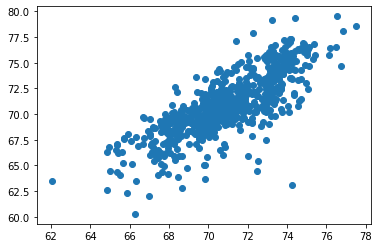

In [125]:
plt.scatter(y_train_pred, y_train)

In [180]:
r2_score(y_train_pred, y_train)

0.8801328506983639

le score est pourri --> je supprime les coef inutilses car trop faibles (greve,...)

In [108]:
y_test_pred = regression_model.predict(X_test)

In [109]:
rmse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
r2

1.0

In [ ]:
plt.scatter(y_train_pred, y_train)

In [152]:
# en supprimant plus de variables car coef quasi vide sur greves,....
# aprsè de multiples suppressions, on arrive avec des P>T < 5% et un Adj. R-squared:	0.621
reg_multi = smf.ols('reel~effectif+veille_ferie+vacances+veille_vacances+ramadan+viande+poisson+noel+frites+Lundi+Vendredi+Avril+Fevrier+Janvier+Juillet+Juin+Mars+Octobre+Septembre', data=data).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.013
Date:                Fri, 02 Dec 2022   Prob (F-statistic):             0.0829
Time:                        12:23:58   Log-Likelihood:                -8603.5
No. Observations:                1032   AIC:                         1.721e+04
Df Residuals:                    1030   BIC:                         1.722e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.335e+04     33.608    397.220      0.000    1.33e+04    1.34e+04
Septembre    166.2825     95.803      1.736      0.083     -21.709     354.274
==============================================================================
Omnibus:                       38.250   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.369
Skew:                           0.243   Prob(JB):                     5.11e-06
Kurtosis:                       2.425   Cond. No.                         3.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.8801328506983639

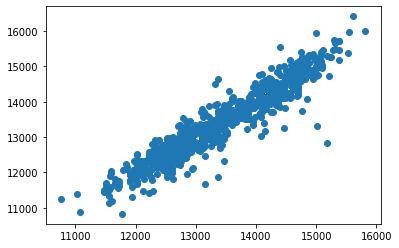

In [148]:
X = data[['effectif','veille_ferie','vacances','veille_vacances','ramadan','viande','poisson','noel','frites','Lundi','Vendredi','Avril','Fevrier','Janvier','Juillet','Juin','Mars','Octobre','Septembre']]

y = data[['reel']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(X_train, y_train)
# Prédiction


y_train_pred = regression_model.predict(X_train)

plt.scatter(y_train_pred, y_train)
r2_score(y_train_pred, y_train)

In [153]:
data.head()


,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# toujours aussi pourri --> suppression drastiques


X = data[['Jeudi','Lundi','Mardi','Vendredi','Avril','Decembre','Fevrier','Janvier','Juillet','Juin','Mai','Mars','Novembre','Octobre','Septembre']]

y = data[['freq']]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#--> on en epeut pas faire ça car c'est une timeseries
data_train = data[~data['date'].str.contains("2019")]
data_test = data[data['date'].str.contains("2019")]
X_train = data_train[['effectif','veille_ferie','vacances','veille_vacances','ramadan','viande','poisson','noel','frites','Lundi','Vendredi','Avril','Fevrier','Janvier','Juillet','Juin','Mars','Octobre','Septembre']]
Y_train = data_train[['reel']]
X_test = data_test[['effectif','veille_ferie','vacances','veille_vacances','ramadan','viande','poisson','noel','frites','Lundi','Vendredi','Avril','Fevrier','Janvier','Juillet','Juin','Mars','Octobre','Septembre']]
Y_test = data_test[['reel']]



In [163]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1060 to 1181
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   reel    88 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


0.023668160630463286

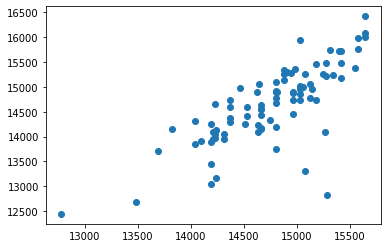

In [179]:
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(X_train, Y_train)
# Prédiction

Y_test_prediction = regression_model.predict(X_test)

plt.scatter(Y_test_prediction, Y_test)
r2_score(Y_test_prediction, Y_test)

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

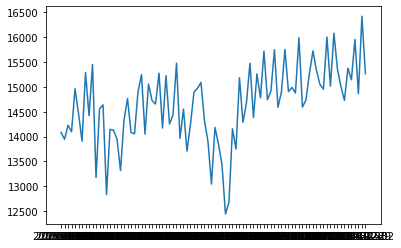

In [171]:
ax = plt.plot(data_test['date'], data_test['reel'])
Y_train_pred_df = pd.DataFrame(Y_train_pred)
Y_train_pred_df.set_axis(['freq_prev'], axis='columns', inplace=True)
Y_train_pred_df

# data_test.merge(Y_train_pred_df)
data_test2 = data_test.merge(Y_train_pred, left_index=True, right_index=True, how='inner')
merged[['reel', 'freq_prev']]
ax = plt.plot(Y_train_pred['date'], data_test['reel']) # température
ax = plt.plot(Y_train_pred['date'], data_test['freq_prev']) # température
plt.show()

,freq_prev
0,11573.132572
1,12003.443272
2,12003.443272
3,12619.056569
4,11951.272316
...,...
939,14731.934355
940,14301.623656
941,15110.074099
942,15868.761146
